In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import quandl

import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split


In [99]:
!pip install quandl

In [1]:
from google.colab import files
uploaded = files.upload()

Saving DIS Historical Data (2).csv to DIS Historical Data (2).csv


In [102]:
df = quandl.get("WIKI/DIS", api_key = "un4oeHqqRr_jSP_--S4K")

In [103]:
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1962-01-02,37.25,38.50,37.2500,37.25,2098.0,0.0,1.0,0.141259,0.145999,0.141259,0.141259,408858.24
1962-01-03,37.25,37.88,37.2500,37.75,1998.0,0.0,1.0,0.141259,0.143648,0.141259,0.143155,389370.24
1962-01-04,37.75,37.88,37.5000,37.75,2397.0,0.0,1.0,0.143155,0.143648,0.142207,0.143155,467127.36
1962-01-05,37.75,38.00,37.6300,37.88,2397.0,0.0,1.0,0.143155,0.144103,0.142700,0.143648,467127.36
1962-01-08,37.88,38.38,37.0000,37.75,3197.0,0.0,1.0,0.143648,0.145544,0.140311,0.143155,623031.36
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,101.50,102.94,101.4200,101.82,5917934.0,0.0,1.0,101.500000,102.940000,101.420000,101.820000,5917934.00
2018-03-22,101.29,101.64,100.4100,100.60,8648198.0,0.0,1.0,101.290000,101.640000,100.410000,100.600000,8648198.00
2018-03-23,100.85,101.11,98.4500,98.54,7380554.0,0.0,1.0,100.850000,101.110000,98.450000,98.540000,7380554.00


In [110]:
df = df[['Adj. Close']]

In [111]:
df

,Adj. Close
Date,
1962-01-02,0.141259
1962-01-03,0.143155
1962-01-04,0.143155
1962-01-05,0.143648
1962-01-08,0.143155
...,...
2018-03-21,101.820000
2018-03-22,100.600000
2018-03-23,98.540000


In [113]:
forecast_out = int(30)
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

In [114]:
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [115]:
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [117]:
clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9929401877157883


In [118]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[104.74649277 105.22884967 105.81169759 107.16832637 106.61562576
 105.68105926 105.8719922  107.89186172 110.46443184 105.50017543
 103.78177898 103.18888195 103.61094424 104.03300653 105.57051914
 104.21389036 104.65605086 105.359488   105.80164849 104.35457779
 104.52541253 103.86217179 103.49035502 102.09352983 101.9628915
 102.4351993  101.20920885  99.13909383 101.25945436  99.96312019]


In [120]:
to_test = df[-30:]['Adj. Close']
actual = np.array(to_test)

Text(0.5, 1.0, 'Stock Prediction for Disney')

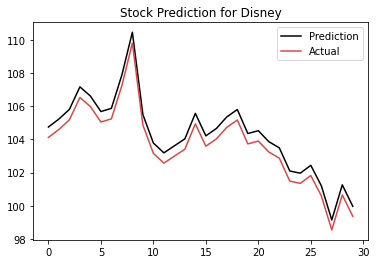

In [125]:
plt.plot(days, forecast_prediction, color = "000000", label="Prediction")
plt.plot(days, actual, color = "#dd4646", label="Actual")
plt.legend(loc = 1)
plt.title("Stock Prediction for Disney: Testing Model from ")